## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [226]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette('Paired')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

### Feature Engineering

Before implementing models on the data, I will deal with categorical features, and then scale the data first to make sure the features are in the same range.


In [45]:
# read clean azdias data
azdias_clean = pd.read_csv('./data/azdias_cleaned.csv', index_col=0)

azdias_clean.head()

,LNR,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ARBEIT,BALLRAUM,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910220,9.0,NaN,21.0,NaN,0.0,2.0,12.0,3.0,6.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
1,910225,9.0,17.0,17.0,10.0,0.0,1.0,7.0,3.0,2.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
2,910226,1.0,13.0,13.0,1.0,0.0,NaN,2.0,2.0,4.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
3,910241,1.0,20.0,14.0,3.0,0.0,NaN,3.0,4.0,2.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3
4,910244,1.0,10.0,10.0,5.0,0.0,1.0,2.0,2.0,6.0,...,2.0,10.0,7.0,4.0,6.0,9.0,7.0,4,2,1


In [46]:
# read clean customers data
customers_clean = pd.read_csv('./data/customers_cleaned.csv', index_col=0)
 
customers_clean.head()

,LNR,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ARBEIT,BALLRAUM,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,1.0,10.0,10.0,1.0,0.0,2.0,1.0,1.0,3.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,143872,1.0,6.0,0.0,1.0,0.0,1.0,1.0,3.0,7.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
2,143873,1.0,8.0,8.0,NaN,0.0,NaN,1.0,1.0,7.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
3,143874,1.0,20.0,14.0,7.0,0.0,NaN,7.0,3.0,3.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3
4,143888,1.0,11.0,10.0,1.0,0.0,2.0,1.0,3.0,7.0,...,1.0,6.0,9.0,1.0,2,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,3


In [47]:
azdias_clean.dtypes.value_counts()

float64    264
int64       87
object       4
dtype: int64

In [48]:
customers_clean.dtypes.value_counts()

float64    264
int64       88
object       6
dtype: int64

#### Dealing with Categorical Features
Before scaling the data, I will have a look at the categorical features, and create dummmy variables.

In [49]:
acdias_categorical = azdias_clean.select_dtypes(include='object')
acdias_categorical

,CAMEO_DEU_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,8A,NaN,1992-02-10,W
1,4C,D19_UNBEKANNT,1992-02-12,W
2,2A,D19_UNBEKANNT,1997-04-21,W
3,6B,D19_SCHUHE,1992-02-12,W
4,8C,D19_ENERGIE,1992-02-12,W
...,...,...,...,...
737283,7A,D19_HAUS_DEKO,1992-02-10,W
737284,9D,D19_UNBEKANNT,1992-02-10,W
737285,4C,D19_BEKLEIDUNG_GEH,1992-02-10,W
737286,9D,D19_UNBEKANNT,1992-02-12,W


In [50]:
acdias_categorical.nunique()

CAMEO_DEU_2015                44
D19_LETZTER_KAUF_BRANCHE      35
EINGEFUEGT_AM               2819
OST_WEST_KZ                    2
dtype: int64

Checking the meaning of the categorical features, and the number of unique features, I will drop columns `CAMEO_DEU_2015`, `D19_LETZTER_KAUF_BRANCHE` and `EINGEFUEGT_AM`.

In [51]:
drop_cat_col = ['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM']
azdias_clean.drop(drop_cat_col, axis=1, inplace=True)
customers_clean.drop(drop_cat_col, axis=1, inplace=True)

In [52]:
customers_clean.select_dtypes(include='object')

,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
0,W,COSMETIC_AND_FOOD,MULTI_BUYER
1,W,COSMETIC_AND_FOOD,MULTI_BUYER
2,W,COSMETIC,MULTI_BUYER
3,W,FOOD,MULTI_BUYER
4,W,COSMETIC_AND_FOOD,MULTI_BUYER
...,...,...,...
134241,W,COSMETIC_AND_FOOD,MULTI_BUYER
134242,W,COSMETIC,SINGLE_BUYER
134243,W,COSMETIC_AND_FOOD,MULTI_BUYER
134244,W,FOOD,SINGLE_BUYER


For column `OST_WEST_KZ`, I will create dummy variables.

In [53]:
azdias_clean = pd.concat([azdias_clean.drop(['OST_WEST_KZ'], axis=1), pd.get_dummies(azdias_clean['OST_WEST_KZ'])], axis=1)
customers_clean = pd.concat([customers_clean.drop(['OST_WEST_KZ'], axis=1), pd.get_dummies(customers_clean['OST_WEST_KZ'])], axis=1)

In [54]:
customers_clean.select_dtypes(include='object')

,PRODUCT_GROUP,CUSTOMER_GROUP
0,COSMETIC_AND_FOOD,MULTI_BUYER
1,COSMETIC_AND_FOOD,MULTI_BUYER
2,COSMETIC,MULTI_BUYER
3,FOOD,MULTI_BUYER
4,COSMETIC_AND_FOOD,MULTI_BUYER
...,...,...
134241,COSMETIC_AND_FOOD,MULTI_BUYER
134242,COSMETIC,SINGLE_BUYER
134243,COSMETIC_AND_FOOD,MULTI_BUYER
134244,FOOD,SINGLE_BUYER


The additional columns in customers dataset are not useful in thie part, I will drop the three columns for now.

In [55]:
customers_clean.drop(['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE'], axis=1, inplace=True)

In [56]:
azdias_clean.shape, customers_clean.shape

((737288, 353), (134246, 353))

#### Impute Missing Values
Before moving to modeling, we have to impute missing values. I will use the most common value to replace the missing values in thie part of the project.

In [57]:
imputer = SimpleImputer(strategy='most_frequent')

azdias_clean = pd.DataFrame(imputer.fit_transform(azdias_clean), columns = azdias_clean.columns)
customers_clean = pd.DataFrame(imputer.fit_transform(customers_clean), columns = customers_clean.columns)

#### Feature Scaling
After processing all the categorical features, I will use standardscaler from scikitlearn to scale data.

In [58]:
# scale data
scaler = StandardScaler()

scaler.fit(azdias_clean)

azdias = pd.DataFrame(scaler.transform(azdias_clean), columns = azdias_clean.columns)
customers = pd.DataFrame(scaler.transform(customers_clean), columns = customers_clean.columns)

In [59]:
azdias.head()

,LNR,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ARBEIT,BALLRAUM,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,O,W
0,1.057636,1.262251,0.565394,1.560767,-0.764008,-0.299061,0.756960,0.335407,-0.183295,0.849607,...,1.064908,1.454873,-0.747722,0.547826,-0.028542,1.141224,0.958448,-1.682098,-0.515933,0.515933
1,1.057655,1.262251,0.275032,0.674377,2.542226,-0.299061,-0.679418,-0.031840,-0.183295,-0.980487,...,0.450914,0.023979,-0.747722,0.547826,-1.083086,1.141224,0.958448,0.168026,-0.515933,0.515933
2,1.057659,-0.934331,-0.886417,-0.212013,-0.764008,-0.299061,-0.679418,-0.399086,-1.187413,-0.065440,...,0.757911,1.812596,0.952074,0.547826,1.553275,-0.279664,0.958448,1.093087,-0.515933,0.515933
3,1.057717,-0.934331,1.146119,0.009584,-0.029290,-0.299061,-0.679418,-0.325637,0.820823,-0.980487,...,-0.777072,-0.691468,-1.314321,0.547826,-0.555814,0.430780,-1.043354,0.168026,-0.515933,0.515933
4,1.057729,-0.934331,-1.757504,-0.876806,0.705429,-0.299061,-0.679418,-0.399086,-1.187413,0.849607,...,-0.163079,-0.691468,0.952074,0.547826,1.553275,0.430780,0.958448,-1.682098,-0.515933,0.515933


In [60]:
customers.head()

,LNR,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ARBEIT,BALLRAUM,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,O,W
0,-2.436847,-0.934331,-1.757504,-0.876806,-0.764008,-0.299061,0.756960,-0.472535,-2.191531,-0.522963,...,-1.391066,-1.406915,0.952074,0.547826,1.553275,-0.279664,-1.043354,1.093087,-0.515933,0.515933
1,-1.915946,-0.934331,-2.918953,-3.092781,-0.764008,-0.299061,-0.679418,-0.472535,-0.183295,1.307130,...,1.678901,1.812596,0.952074,0.547826,-1.083086,-0.279664,0.958448,1.093087,-0.515933,0.515933
2,-1.915942,-0.934331,-2.338228,-1.320001,-0.764008,-0.299061,0.756960,-0.472535,-2.191531,1.307130,...,-1.084069,-1.406915,0.952074,0.547826,1.553275,-1.700552,-1.043354,1.093087,-0.515933,0.515933
3,-1.915938,-0.934331,1.146119,0.009584,1.440148,-0.299061,0.756960,-0.031840,-0.183295,-0.522963,...,-0.777072,-0.691468,-1.314321,0.547826,-0.555814,-1.700552,-1.043354,0.168026,-0.515933,0.515933
4,-1.915884,-0.934331,-1.467142,-0.876806,-0.764008,-0.299061,0.756960,-0.472535,-0.183295,1.307130,...,-1.698063,-1.764638,0.952074,0.547826,-1.610359,-0.990108,-1.043354,0.168026,-0.515933,0.515933


In [61]:
azdias.dtypes.value_counts()

float64    353
dtype: int64

In [239]:
# create function for feature engineering process
def feature_eng(azdias_clean, customers_clean):
    '''
    Feature engineering for clean azdias and customers dataset
    
    INPUT:
         azdias_clean: azdias DataFrame from ETL part
         customers_clean: customers DataFrame from ETL part
    
    OUTPUT:
         azdias: azdias DataFrame after feature engineering
         customers: customers DataFrame after feature engineering
    '''
    
    print('.......... Deal With Categorical Columns ..........')
    # drop some categorical columns
    drop_cat_col = ['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM']
    azdias = azdias_clean.drop(drop_cat_col, axis=1)
    customers = customers_clean.drop(drop_cat_col, axis=1)

    # create dummy variables for the remaining categorical columns
    azdias = pd.concat([azdias.drop(['OST_WEST_KZ'], axis=1), pd.get_dummies(azdias['OST_WEST_KZ'])], axis=1)
    customers = pd.concat([customers.drop(['OST_WEST_KZ'], axis=1), pd.get_dummies(customers['OST_WEST_KZ'])], axis=1)
    
    # drop additional columns in customers data
    customers.drop(['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE'], axis=1, inplace=True)

    print('.......... Impute Missing Variables ..........')
    # inpute missing variables with the most frequent value
    imputer = SimpleImputer(strategy='most_frequent')

    azdias = pd.DataFrame(imputer.fit_transform(azdias), columns = azdias.columns)
    customers = pd.DataFrame(imputer.fit_transform(customers), columns = customers.columns)
    
    print('.......... Scale Data ..........')
    # perfrom feature scalling
    # scale data
    scaler = StandardScaler()

    scaler.fit(azdias)

    azdias = pd.DataFrame(scaler.transform(azdias), columns = azdias.columns)
    customers = pd.DataFrame(scaler.transform(customers), columns = customers.columns)
    
    print('.......... Complete ..........')
    return azdias, customers

In [240]:
azdias_clean = pd.read_csv('./data/azdias_cleaned.csv', index_col=0)
customers_clean = pd.read_csv('./data/customers_cleaned.csv', index_col=0)

In [241]:
print(azdias_clean.shape, customers_clean.shape)

(737288, 355) (134246, 358)


In [242]:
azdias, customers = feature_eng(azdias_clean, customers_clean)

.......... Deal With Categorical Columns ..........
.......... Impute Missing Variables ..........
.......... Scale Data ..........
.......... Complete ..........


In [243]:
print(azdias.shape, customers.shape)

(737288, 353) (134246, 353)


In [244]:
azdias.head()

,LNR,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ARBEIT,BALLRAUM,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,O,W
0,1.057636,1.262251,0.565394,1.560767,-0.764008,-0.299061,0.756960,0.335407,-0.183295,0.849607,...,1.064908,1.454873,-0.747722,0.547826,-0.028542,1.141224,0.958448,-1.682098,-0.515933,0.515933
1,1.057655,1.262251,0.275032,0.674377,2.542226,-0.299061,-0.679418,-0.031840,-0.183295,-0.980487,...,0.450914,0.023979,-0.747722,0.547826,-1.083086,1.141224,0.958448,0.168026,-0.515933,0.515933
2,1.057659,-0.934331,-0.886417,-0.212013,-0.764008,-0.299061,-0.679418,-0.399086,-1.187413,-0.065440,...,0.757911,1.812596,0.952074,0.547826,1.553275,-0.279664,0.958448,1.093087,-0.515933,0.515933
3,1.057717,-0.934331,1.146119,0.009584,-0.029290,-0.299061,-0.679418,-0.325637,0.820823,-0.980487,...,-0.777072,-0.691468,-1.314321,0.547826,-0.555814,0.430780,-1.043354,0.168026,-0.515933,0.515933
4,1.057729,-0.934331,-1.757504,-0.876806,0.705429,-0.299061,-0.679418,-0.399086,-1.187413,0.849607,...,-0.163079,-0.691468,0.952074,0.547826,1.553275,0.430780,0.958448,-1.682098,-0.515933,0.515933


In [245]:
customers.head()

,LNR,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ARBEIT,BALLRAUM,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,O,W
0,-2.436847,-0.934331,-1.757504,-0.876806,-0.764008,-0.299061,0.756960,-0.472535,-2.191531,-0.522963,...,-1.391066,-1.406915,0.952074,0.547826,1.553275,-0.279664,-1.043354,1.093087,-0.515933,0.515933
1,-1.915946,-0.934331,-2.918953,-3.092781,-0.764008,-0.299061,-0.679418,-0.472535,-0.183295,1.307130,...,1.678901,1.812596,0.952074,0.547826,-1.083086,-0.279664,0.958448,1.093087,-0.515933,0.515933
2,-1.915942,-0.934331,-2.338228,-1.320001,-0.764008,-0.299061,0.756960,-0.472535,-2.191531,1.307130,...,-1.084069,-1.406915,0.952074,0.547826,1.553275,-1.700552,-1.043354,1.093087,-0.515933,0.515933
3,-1.915938,-0.934331,1.146119,0.009584,1.440148,-0.299061,0.756960,-0.031840,-0.183295,-0.522963,...,-0.777072,-0.691468,-1.314321,0.547826,-0.555814,-1.700552,-1.043354,0.168026,-0.515933,0.515933
4,-1.915884,-0.934331,-1.467142,-0.876806,-0.764008,-0.299061,0.756960,-0.472535,-0.183295,1.307130,...,-1.698063,-1.764638,0.952074,0.547826,-1.610359,-0.990108,-1.043354,0.168026,-0.515933,0.515933


### Principal Component Analysis (PCA)
Before using any unsupervised models on the data, I will conduct dimensionality reduction with PCA.

In [62]:
pca = PCA()
pca.fit_transform(azdias)

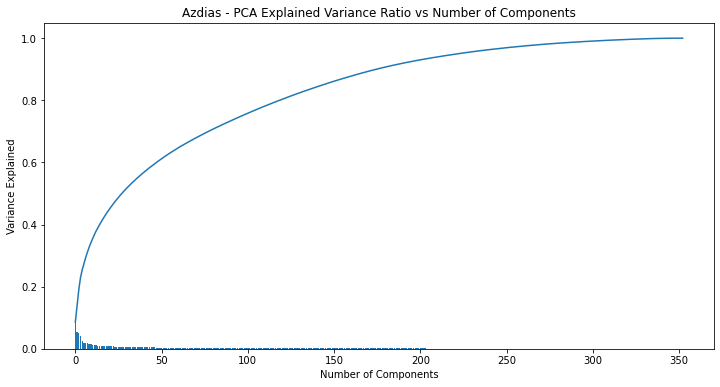

In [79]:
# scree plot

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
ax.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum())

plt.title('Azdias - PCA Explained Variance Ratio vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')

plt.show()

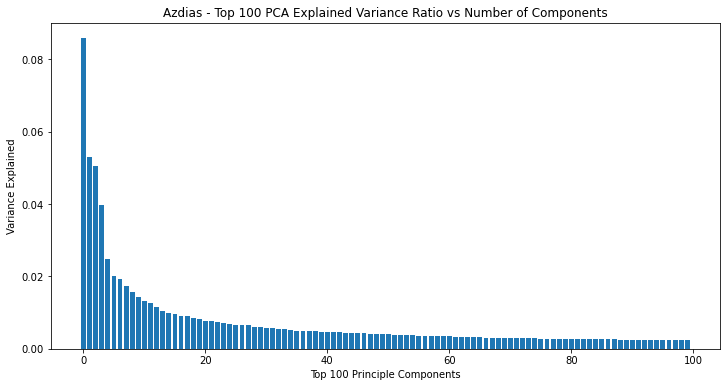

In [87]:
# take a look at the top 100 components
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(len(pca.explained_variance_ratio_))[:100], pca.explained_variance_ratio_[:100])

plt.title('Azdias - Top 100 PCA Explained Variance Ratio vs Number of Components')
plt.xlabel('Top 100 Principle Components')
plt.ylabel('Variance Explained')

plt.show()


The top 4 components have the highest variances explained.

In [89]:
variance_explained = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), columns=['cumulative_variance'])
variance_explained.set_index(variance_explained.index+1, inplace=True)

num_components = variance_explained[variance_explained['cumulative_variance']>.95].index[0]

print('95% of the variance can be explained by {} components.'.format(num_components))


95% of the variance can be explained by 223 components.


In [143]:
# apply pca with number of components
pca = PCA(n_components=223).fit(azdias)
azdias_pca = pd.DataFrame(pca.transform(azdias))

In [91]:
top_five_pca = pca.explained_variance_ratio_[:5]

print('The top five components explain {:.2%} of variance.'.format(top_five_pca.sum()))


The top five components explain 25.43% of variance.


In [131]:
top_five_pca

array([0.08584413, 0.05307572, 0.05064924, 0.03980513, 0.02492427])

In [114]:
# read feature info
feature_info = pd.read_excel('./DIAS/DIAS Information Levels - Attributes 2017.xlsx', header=1)
del feature_info['Unnamed: 0']
feature_info.head()


,Information level,Attribute,Description,Additional notes
0,NaN,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
1,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
2,NaN,ANREDE_KZ,gender,NaN
3,NaN,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
4,NaN,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...


In [126]:
# pca.components_[0]

In [125]:
feature_weights = pd.DataFrame(pca.components_[0], index=azdias.columns, columns=['weight']).sort_values(by='weight', ascending=False).round(2)
feature_weights_info = feature_weights.reset_index().merge(feature_info, how='left', left_on='index', right_on='Attribute')[['index', 'weight', 'Description']]
print('Component 1 explains {:.1%} of variance and is determined by: '.format(top_five_pca[0]))
feature_weights_info.head(), feature_weights_info.tail()

Component 1 explains 8.6% of variance and is determined by: 


(            index  weight                              Description
 0      MOBI_REGIO    0.14                          moving patterns
 1      PLZ8_ANTG1    0.13  number of 1-2 family houses in the PLZ8
 2     KBA13_ANTG1    0.13                                      NaN
 3  LP_STATUS_FEIN    0.13                      social status fine 
 4     KBA05_ANTG1    0.13  number of 1-2 family houses in the cell,
                   index  weight                               Description
 348        KBA13_BAUMAX   -0.12                                       NaN
 349         KBA13_ANTG4   -0.12                                       NaN
 350  HH_EINKOMMEN_SCORE   -0.12           estimated household_net_income 
 351         KBA13_ANTG3   -0.13                                       NaN
 352          PLZ8_ANTG3   -0.13  number of 6-10 family houses in the PLZ8)

In [255]:
def understand_component(pca, component_number, azdias, feature_info):
    '''
    Explain feature weights for selected component in PCA 
    by showing the top 5 positive weighted features and top 5 negative weighted features.
    
    INPUT:
         pca: pca model
         component_number: the component number
         azdias: azdias dataset used for PCA
         feature_info: attribute descriptions
    
    OUTPUT:
         Top 5 positive and top 5 negative weighted features in the component,
         the wights, and their feature descriptions
    '''
    ind = component_number-1
    feature_weights = pd.DataFrame(pca.components_[ind], index=azdias.columns, columns=['weight']).sort_values(by='weight', ascending=False).round(2)
    feature_weights_info = feature_weights.reset_index().merge(feature_info, how='left', left_on='index', right_on='Attribute')[['index', 'weight', 'Description']]
    comp_variance = pca.explained_variance_ratio_[ind]
    print('Component {} explains {:.1%} of variance and is determined by: '.format(component_number, comp_variance))
    result = pd.concat([feature_weights_info.head(), feature_weights_info.tail()])

    return result

In [256]:
understand_component(pca, 1, azdias, feature_info)

Component 1 explains 8.6% of variance and is determined by: 


,index,weight,Description
0,MOBI_REGIO,0.14,moving patterns
1,PLZ8_ANTG1,0.13,number of 1-2 family houses in the PLZ8
2,KBA13_ANTG1,0.13,NaN
3,LP_STATUS_FEIN,0.13,social status fine
4,KBA05_ANTG1,0.13,number of 1-2 family houses in the cell
348,KBA13_BAUMAX,-0.12,NaN
349,KBA13_ANTG4,-0.12,NaN
350,HH_EINKOMMEN_SCORE,-0.12,estimated household_net_income
351,KBA13_ANTG3,-0.13,NaN
352,PLZ8_ANTG3,-0.13,number of 6-10 family houses in the PLZ8


The `First Component`:
1. high positive weights on moving patterns, social status, and households with fewer family houses.
2. high negative weights on household income and households with many family houses.
3. associated with mobility, and family wealth.

In [257]:
understand_component(pca, 2, azdias, feature_info)

Component 2 explains 5.3% of variance and is determined by: 


,index,weight,Description
0,ONLINE_AFFINITAET,0.14,online affinity
1,D19_GESAMT_ANZ_24,0.13,NaN
2,D19_GESAMT_ANZ_12,0.12,NaN
3,D19_VERSAND_ANZ_24,0.12,NaN
4,PRAEGENDE_JUGENDJAHRE,0.11,dominating movement in the person's youth (ava...
348,VK_DHT4A,-0.12,NaN
349,D19_VERSAND_DATUM,-0.12,actuality of the last transaction for the segm...
350,D19_GESAMT_DATUM,-0.12,actuality of the last transaction with the com...
351,D19_VERSAND_ONLINE_DATUM,-0.12,actuality of the last transaction for the segm...
352,D19_GESAMT_ONLINE_DATUM,-0.13,actuality of the last transaction with the com...


The `Second Component`:
1. high positive weight on online affinity and youth movement.
2. high negative weight on financial behaviors.
3. associate with online behaviors, and youth movements.

In [259]:
understand_component(pca, 3, azdias, feature_info)

Component 3 explains 5.1% of variance and is determined by: 


,index,weight,Description
0,KBA13_HERST_BMW_BENZ,0.16,share of BMW & Mercedes Benz within the PLZ8
1,KBA13_SEG_OBEREMITTELKLASSE,0.14,share of upper middle class cars and upper cla...
2,KBA13_MERCEDES,0.13,share of MERCEDES within the PLZ8
3,KBA13_BMW,0.13,share of BMW within the PLZ8
4,KBA13_SITZE_4,0.13,number of cars with less than 5 seats in the PLZ8
348,CJT_TYP_3,-0.11,NaN
349,KBA13_HALTER_20,-0.11,share of car owners below 21 within the PLZ8
350,KBA13_KMH_140_210,-0.11,share of cars with max speed between 140 and 2...
351,KBA13_SEG_KLEINWAGEN,-0.11,share of small and very small cars (Ford Fiest...
352,KBA13_SITZE_5,-0.13,number of cars with 5 seats in the PLZ8


The `Third Component`:
1. high positive weights on the share of upper-middle-class cars in the neighborhood.
2. high negative weights on the share of car owners below 21, the share of small cars, etc in the neighborhood.
3. associate with car situations.

In [260]:
understand_component(pca, 4, azdias, feature_info)

Component 4 explains 4.0% of variance and is determined by: 


,index,weight,Description
0,FINANZ_VORSORGER,0.14,financial typology: be prepared
1,ALTERSKATEGORIE_GROB,0.13,age through prename analysis
2,CJT_TYP_5,0.13,NaN
3,CJT_TYP_3,0.11,NaN
4,CJT_TYP_4,0.11,NaN
348,FINANZ_UNAUFFAELLIGER,-0.14,financial typology: unremarkable
349,CJT_TYP_1,-0.14,NaN
350,PRAEGENDE_JUGENDJAHRE,-0.14,dominating movement in the person's youth (ava...
351,FINANZ_SPARER,-0.15,financial typology: money saver
352,FINANZ_ANLEGER,-0.15,financial typology: investor


The `Fourth Component`:
1. high positive weights on financial typology to be prepared and age group.
2. high negative weights on financial typology to be unremarkable, money saver and investor, and on movement in youth.
3. associated with financial status.

### K-Means Clustering
After reducing feature dimensions, I will apply K-Means clustering algorithm to the general population to generate segments.

In [139]:
azdias_pca.shape

(737288, 223)

In [213]:
azdias_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
0,-4.647393,-1.181988,6.627867,-5.605593,0.809196,-1.071628,4.782175,0.437835,-0.609146,1.622824,...,-0.492695,0.138878,-0.281928,0.118928,0.679945,-0.292024,0.752777,-0.722233,-0.059639,0.014230
1,-0.250162,-2.987496,1.624625,-2.980866,4.011843,-5.256440,-4.355620,-1.630991,1.712323,-0.906395,...,-0.508776,0.343076,0.165325,0.017222,0.620016,-0.460195,0.056836,0.173737,-0.663827,-0.191170
2,4.216187,-5.827695,-2.691335,-2.393434,-0.541252,-0.687355,1.699884,-1.441062,-2.839744,1.946854,...,-0.325277,-0.484861,-0.260785,0.033904,-0.004119,-0.362969,-0.276937,0.552653,1.020702,-0.800032
3,5.689148,6.866662,6.451755,6.139786,-3.278370,2.698764,-3.028011,-3.538966,-0.068657,4.213567,...,0.781338,-0.608649,0.272418,-0.874328,1.037929,1.126567,-1.162566,0.869879,0.686601,-0.555161
4,2.232395,-3.734789,0.259591,-1.837998,1.146880,0.157574,0.477029,-2.533037,1.192785,2.430927,...,0.096230,0.987406,0.141027,-0.713342,-0.226177,-0.125636,-0.700787,-1.385423,-0.457621,1.074855


In [212]:
# azdias_clean.shape

In [147]:
# apply k-means with different k
sse = []
k_list = range(1, 20)

for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(azdias_pca.sample(50000))
    sse.append(kmeans.inertia_)

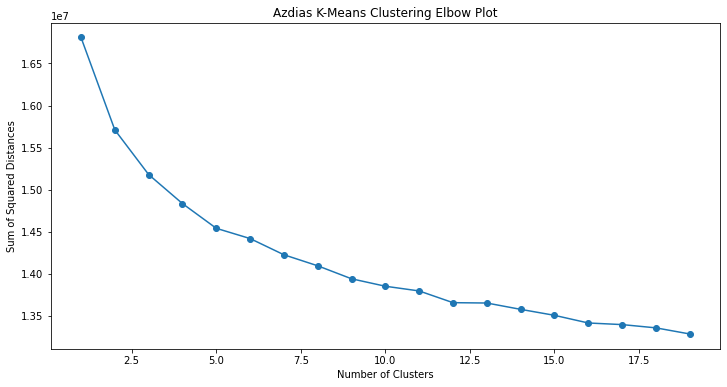

In [148]:
# plot elbow method
fig = plt.figure(figsize=(12,6))

plt.plot(k_list, sse, '-o')
plt.title('Azdias K-Means Clustering Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


From the elbow plot above, the sum of squared distances decreases significantly around 5 clusters, then the number flattened. After 8 clusters, the numbers are decreasing quite steadily. Therefore, 8 is choosen as the number of clusters.

In [150]:
kmeans = KMeans(8, random_state=1)
kmeans.fit(azdias_pca)

KMeans(random_state=1)

In [151]:
# create azdias clusters 
azdias_clusters = kmeans.predict(azdias_pca)

In [152]:
# create costomers clusters
customers_pca = pca.transform(customers)
customers_clusters = kmeans.predict(customers_pca)

In [156]:
pd.Series(azdias_clusters).value_counts().sort_index()

0     89838
1    113391
2     66694
3     64394
4     95237
5     79067
6    115471
7    113196
dtype: int64

#### Cluster Analysis
Now I have the clusters for the general population and customers, I can analyze the number of people in each cluster, and compare the differences between the clusters.

In [172]:
clusters = pd.DataFrame({'azdias_clusters': pd.Series(azdias_clusters).value_counts().sort_index(),
'customers_clusters': pd.Series(customers_clusters).value_counts().sort_index()})

In [173]:
clusters.reset_index(inplace=True)
clusters.rename(columns={'index':'cluster'}, inplace=True)

In [174]:
clusters

,cluster,azdias_clusters,customers_clusters
0,0,89838,2041
1,1,113391,42407
2,2,66694,26769
3,3,64394,4285
4,4,95237,15948
5,5,79067,3982
6,6,115471,37711
7,7,113196,1103


In [177]:
clusters['cluster']+=1

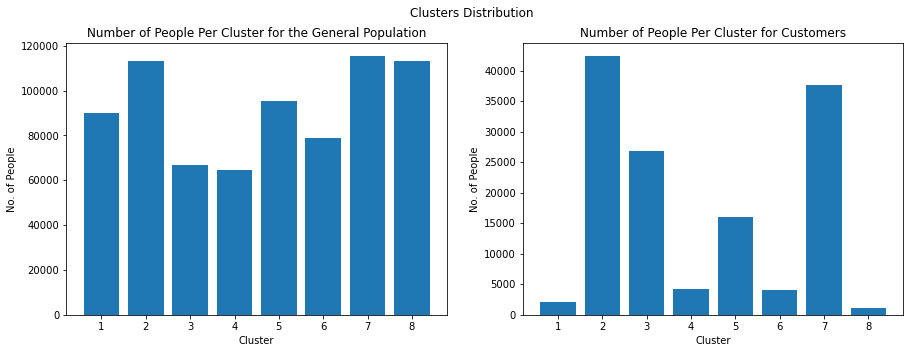

In [178]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))

ax1.bar(clusters['cluster'], clusters['azdias_clusters'])
ax1.set_xlabel('Cluster')
ax1.set_ylabel('No. of People')
ax1.set_title('Number of People Per Cluster for the General Population')

ax2.bar(clusters['cluster'], clusters['customers_clusters'])
ax2.set_xlabel('Cluster')
ax2.set_ylabel('No. of People')
ax2.set_title('Number of People Per Cluster for Customers')

fig.suptitle('Clusters Distribution')

plt.show()

In [182]:
# calculate the proportions of each clusters
clusters['azdias_ratio'] = (clusters['azdias_clusters']/clusters['azdias_clusters'].sum()*100).round(2)
clusters['customers_ratio'] = (clusters['customers_clusters']/clusters['customers_clusters'].sum()*100).round(2)
clusters['ratio_diff'] = clusters['customers_ratio'] - clusters['azdias_ratio']

clusters

,cluster,azdias_clusters,customers_clusters,azdias_ratio,customers_ratio,ratio_diff
0,1,89838,2041,12.18,1.52,-10.66
1,2,113391,42407,15.38,31.59,16.21
2,3,66694,26769,9.05,19.94,10.89
3,4,64394,4285,8.73,3.19,-5.54
4,5,95237,15948,12.92,11.88,-1.04
5,6,79067,3982,10.72,2.97,-7.75
6,7,115471,37711,15.66,28.09,12.43
7,8,113196,1103,15.35,0.82,-14.53


In [187]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

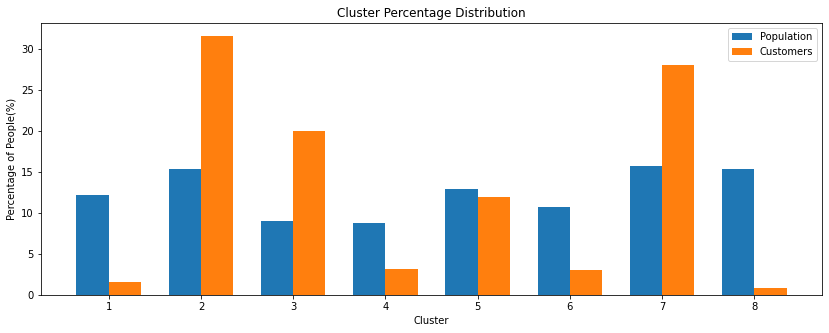

In [195]:
# Plot clusters 
fig, ax = plt.subplots(figsize=(14, 5))
width = 0.35 

rects1 = ax.bar(np.arange(8), clusters['azdias_ratio'], width)
rects2 = ax.bar(np.arange(8)+width, clusters['customers_ratio'], width)


ax.set_title('Cluster Percentage Distribution')
ax.set_ylabel('Percentage of People(%)')
ax.set_xlabel('Cluster')

ax.set_xticks(np.arange(8) + width/2)
ax.set_xticklabels(clusters['cluster'])
ax.legend((rects1[0], rects2[0]), ('Population', 'Customers'))




`Insights`:
1. The distribution of the number of people in each cluster for the general population is almost uniform, with each group taking 10%-15% of the total number of people.
2. The distribution for customers is quite imbalanced, the largest group is cluster 2, taking 30% of the total customers, and the lowest is cluster 8, which has less than 1% of the total customers.
3. There the percentage differences between customers to the general population in Cluster 2, cluster 3, and cluster 7 are positive, suggesting people in these groups are more likely to be customers of the company.

#### Understand Clusters
In this part, I try to understand the clusters by identifying the features that influence each cluster. 


In [205]:
weights = kmeans.cluster_centers_[0]
components = np.arange(len(weights))
    
cluster_info = pd.DataFrame({'weights':weights, 'component':components})
cluster_info.sort_values('weights', ascending=False, inplace=True)


In [210]:
cluster_info.head(2)

,weights,component
2,2.597859,2
1,1.090525,1


In [209]:
for index, row in cluster_info.head(2).iterrows():
    print(index) 
    print(row)

2
weights      2.597859
component    2.000000
Name: 2, dtype: float64
1
weights      1.090525
component    1.000000
Name: 1, dtype: float64


In [214]:
[2,1]*6

[2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]

In [261]:
def understand_cluster(kmeans, cluster_no):
    '''
    Explain feature weights for selected cluster by
    selecting top 2 weighted PCA components
    and showing the top 3 positive weighted features and top 3 negative weighted features
    of the PCA components
    
    INPUT:
         kmeans: K-Means model
         cluster_no: the cluster number
    
    OUTPUT:
         Top 3 positive and top 3 negative weighted features for top 2 weighted component,
         the wights, and their feature descriptions

    
    '''
    
    weights = kmeans.cluster_centers_[cluster_no]
    components = np.arange(len(weights))
    
    cluster_info = pd.DataFrame({'weight':weights, 'component':components})
    cluster_info.sort_values('weight', ascending=False, inplace=True)

    weights = []
    components = []
    comp_weights = []

    for index, row in cluster_info.head(2).iterrows():
        
        feature_weights = pd.DataFrame(pca.components_[int(row['component'])], index=azdias.columns, columns=['weight']).sort_values(by='weight', ascending=False).round(2)
        feature_weights_info = feature_weights.reset_index().merge(feature_info, how='left', left_on='index', right_on='Attribute')[['index', 'weight', 'Description']]

        comp_weights.append(pd.concat([feature_weights_info.head(3), feature_weights_info.tail(3)]))
        components += [int(row['component'])] * 6
        weights +=  [row['weight']] * 6
        
    comp_weights_info = pd.concat(comp_weights, ignore_index=True)
    comp_weights_info.insert(0, 'component_weight', pd.Series(weights))
    comp_weights_info.insert(0, 'component', pd.Series(components))
        
    return comp_weights_info


In [262]:
cluster_1 = understand_cluster(kmeans, 0)
cluster_1

,component,component_weight,index,weight,Description
0,2,2.597859,KBA13_HERST_BMW_BENZ,0.16,share of BMW & Mercedes Benz within the PLZ8
1,2,2.597859,KBA13_SEG_OBEREMITTELKLASSE,0.14,share of upper middle class cars and upper cla...
2,2,2.597859,KBA13_MERCEDES,0.13,share of MERCEDES within the PLZ8
3,2,2.597859,KBA13_KMH_140_210,-0.11,share of cars with max speed between 140 and 2...
4,2,2.597859,KBA13_SEG_KLEINWAGEN,-0.11,share of small and very small cars (Ford Fiest...
5,2,2.597859,KBA13_SITZE_5,-0.13,number of cars with 5 seats in the PLZ8
6,1,1.090525,ONLINE_AFFINITAET,0.14,online affinity
7,1,1.090525,D19_GESAMT_ANZ_24,0.13,NaN
8,1,1.090525,D19_GESAMT_ANZ_12,0.12,NaN
9,1,1.090525,D19_GESAMT_DATUM,-0.12,actuality of the last transaction with the com...


In [223]:
cluster_2 = understand_cluster(kmeans, 1)
cluster_2

,component,component_weight,index,weight,Description
0,0,3.829579,MOBI_REGIO,0.14,moving patterns
1,0,3.829579,PLZ8_ANTG1,0.13,number of 1-2 family houses in the PLZ8
2,0,3.829579,KBA13_ANTG1,0.13,NaN
3,0,3.829579,HH_EINKOMMEN_SCORE,-0.12,estimated household_net_income
4,0,3.829579,KBA13_ANTG3,-0.13,NaN
5,0,3.829579,PLZ8_ANTG3,-0.13,number of 6-10 family houses in the PLZ8
6,11,0.388120,KBA13_ALTERHALTER_45,0.15,share of car owners between 31 and 45 within t...
7,11,0.388120,KBA05_SEG10,0.14,"share of more specific cars (Vans, convertable..."
8,11,0.388120,KBA05_SEG9,0.14,share of vans in the microcell
9,11,0.388120,LP_LEBENSPHASE_GROB,-0.17,lifestage rough


In [224]:
cluster_3 = understand_cluster(kmeans, 2)
cluster_3

,component,component_weight,index,weight,Description
0,2,5.017849,KBA13_HERST_BMW_BENZ,0.16,share of BMW & Mercedes Benz within the PLZ8
1,2,5.017849,KBA13_SEG_OBEREMITTELKLASSE,0.14,share of upper middle class cars and upper cla...
2,2,5.017849,KBA13_MERCEDES,0.13,share of MERCEDES within the PLZ8
3,2,5.017849,KBA13_KMH_140_210,-0.11,share of cars with max speed between 140 and 2...
4,2,5.017849,KBA13_SEG_KLEINWAGEN,-0.11,share of small and very small cars (Ford Fiest...
5,2,5.017849,KBA13_SITZE_5,-0.13,number of cars with 5 seats in the PLZ8
6,3,1.953279,FINANZ_VORSORGER,0.14,financial typology: be prepared
7,3,1.953279,ALTERSKATEGORIE_GROB,0.13,age through prename analysis
8,3,1.953279,CJT_TYP_5,0.13,NaN
9,3,1.953279,PRAEGENDE_JUGENDJAHRE,-0.14,dominating movement in the person's youth (ava...


In [225]:
cluster_7 = understand_cluster(kmeans, 6)
cluster_7

,component,component_weight,index,weight,Description
0,0,7.742996,MOBI_REGIO,0.14,moving patterns
1,0,7.742996,PLZ8_ANTG1,0.13,number of 1-2 family houses in the PLZ8
2,0,7.742996,KBA13_ANTG1,0.13,NaN
3,0,7.742996,HH_EINKOMMEN_SCORE,-0.12,estimated household_net_income
4,0,7.742996,KBA13_ANTG3,-0.13,NaN
5,0,7.742996,PLZ8_ANTG3,-0.13,number of 6-10 family houses in the PLZ8
6,1,3.359038,ONLINE_AFFINITAET,0.14,online affinity
7,1,3.359038,D19_GESAMT_ANZ_24,0.13,NaN
8,1,3.359038,D19_GESAMT_ANZ_12,0.12,NaN
9,1,3.359038,D19_GESAMT_DATUM,-0.12,actuality of the last transaction with the com...


Looking at the top 2 weighted components, and the top 3 weighted features within each component, I have a rough picture of the people who are more likely to be customers:
1. have upper middle-class cars
2. live in exclusive neighborhoods with less number of families
3. prefer shopping online